<a href="https://colab.research.google.com/github/Begizew2112/10academykifiya-AIM-week0/blob/main/ball%20bearing%20progress%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#connect with google drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import all necessary libraries to the preprocessing and **modeling**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load the data and change the working processing to T4 GPU
import tensorflow as tf
#load the data in to the workin area
with tf.device('/GPU:0'):
#load the 500000 data
    df = pd.read_csv('/content/drive/MyDrive/bearing_data.csv')

In [ ]:

# #reduce the data size for sampling
# # Check the length
# original_len = len(df500000)
# target_len = 200_000

# # Downsample by selecting every N-th row
# step = original_len // target_len
# df_downsampled = df500000.iloc[::step]

# # If it overshoots, trim to exactly 200,000 rows
# df= df_downsampled.head(target_len)


In [4]:
# check the sample input data
df.head()

,x_direction,y_direction,bearing tem,env temp
0,-0.117601,-0.378231,41.614912,24.817354
1,0.912196,-0.221813,41.614912,24.817354
2,-0.605148,0.464697,41.614912,24.817354
3,-0.007149,-0.264295,41.614912,24.817354
4,-0.023456,-0.030204,41.614912,24.817354


In [5]:
#check the size of the data
df.shape

(516000, 4)

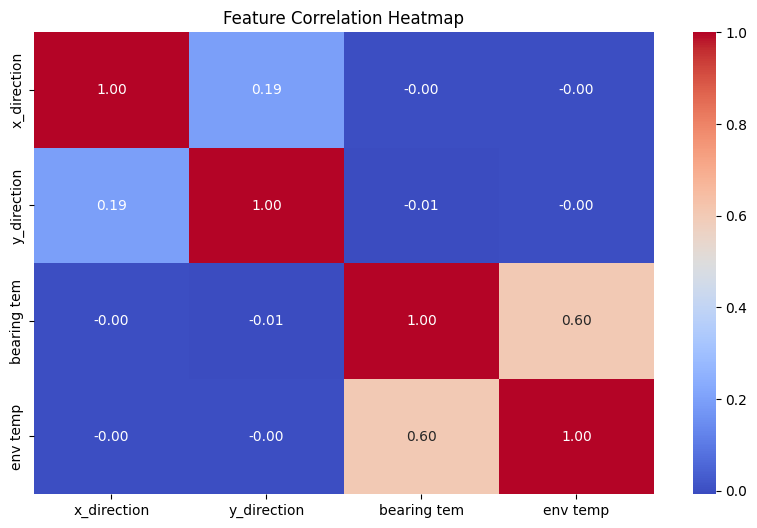

In [ ]:
#view and interprate the correlation analysis of the given columns
# Heatmap of feature correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
df1 = df.copy()

In [7]:

total_rows = len(df1)

In [8]:

total_rows

516000

In [10]:
df1.columns

Index(['x_direction', 'y_direction', 'bearing tem', 'env temp'], dtype='object')

In [11]:
# Compute elapsed hours
df1['elapsed_hours'] = (np.arange(total_rows) / total_rows) * 128

In [12]:
# Compute RUL , the total life fo the bearing is 128 hour
df1['RUL'] = 128 - df1['elapsed_hours']

In [19]:
df2 = df1.drop(['bearing tem','env temp'],axis = 'columns')

In [20]:
# view the sample data of the first and the last four rows
print(df2.head())
# print(df2.tail())

   x_direction  y_direction  elapsed_hours         RUL
0    -0.117601    -0.378231       0.000000  128.000000
1     0.912196    -0.221813       0.000248  127.999752
2    -0.605148     0.464697       0.000496  127.999504
3    -0.007149    -0.264295       0.000744  127.999256
4    -0.023456    -0.030204       0.000992  127.999008


In [ ]:
#check if there is any empty value in the data and fill with appropriate filling method
df2.isnull().sum()

,0
x_direction,0
y_direction,0
elapsed_hours,0
RUL,0


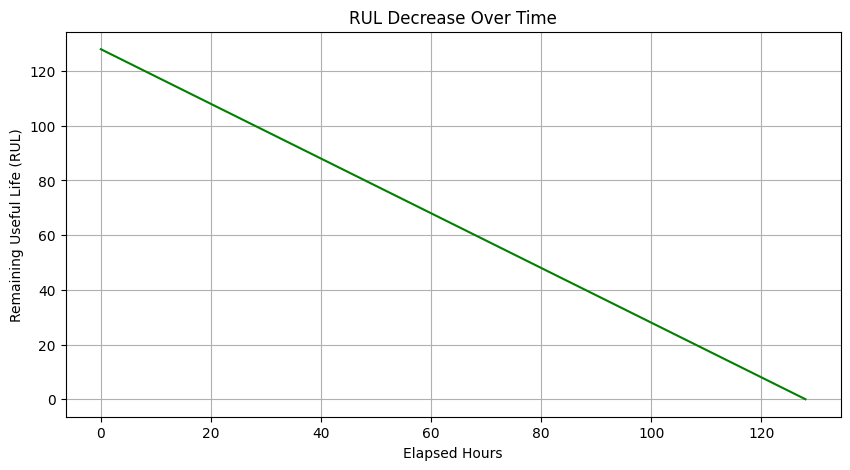

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df2['elapsed_hours'], df2['RUL'], color='green')
plt.xlabel('Elapsed Hours')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('RUL Decrease Over Time')
plt.grid(True)
plt.show()

In [ ]:
df2.head()

,x_direction,y_direction,elapsed_hours,RUL
0,0.449842,-1.878256,0.000000,128.000000
1,-1.197862,1.038843,0.000248,127.999752
2,-0.403052,0.478332,0.000496,127.999504
3,0.244741,0.430743,0.000744,127.999256
4,-1.560034,-1.743736,0.000992,127.999008


# This code generates a line plot to visualize how the sensor readings for both 'x_direction' and 'y_direction' change over time

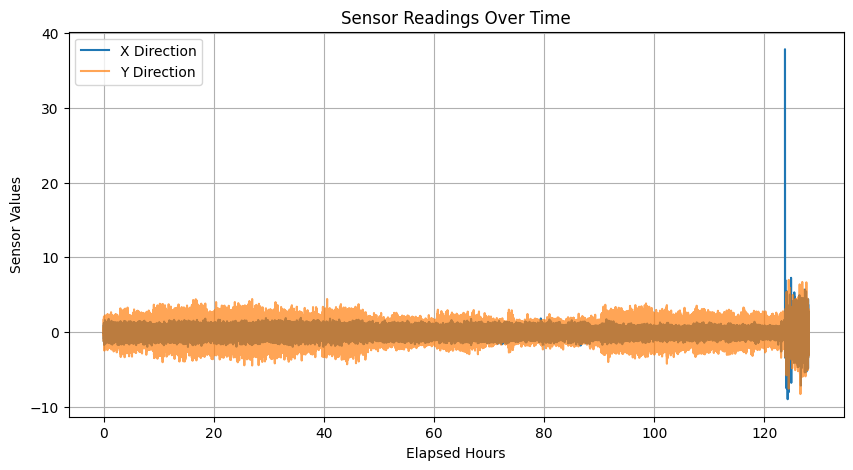

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(df2['elapsed_hours'], df2['x_direction'], label='X Direction')
plt.plot(df2['elapsed_hours'], df2['y_direction'], label='Y Direction', alpha=0.7)
plt.xlabel('Elapsed Hours')
plt.ylabel('Sensor Values')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()

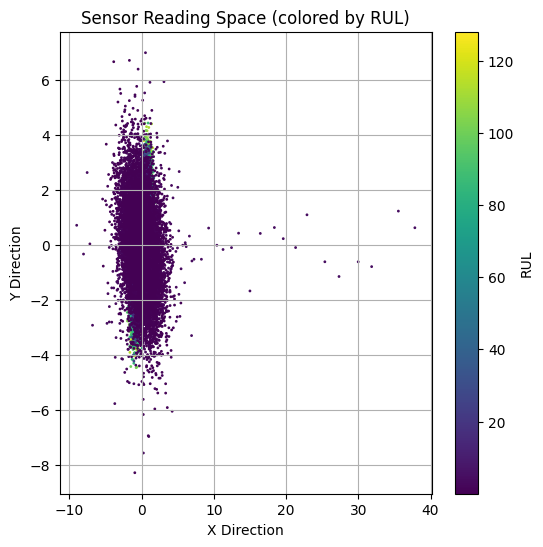

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(df2['x_direction'], df2['y_direction'], c=df2['RUL'], cmap='viridis', s=1)
plt.xlabel('X Direction')
plt.ylabel('Y Direction')
plt.title('Sensor Reading Space (colored by RUL)')
plt.colorbar(label='RUL')
plt.grid(True)
plt.show()

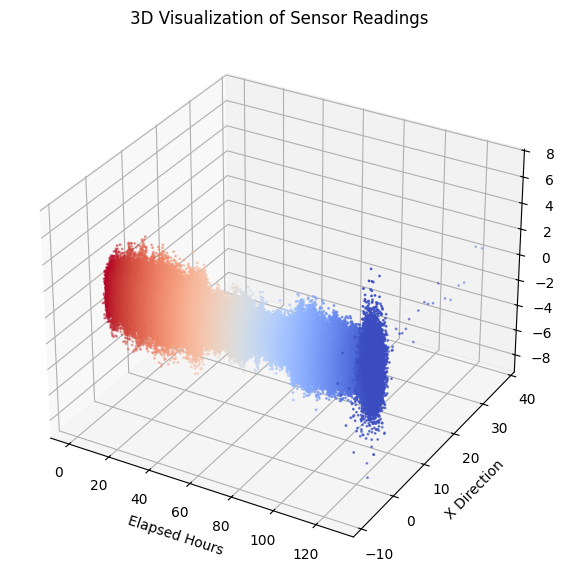

In [23]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['elapsed_hours'], df2['x_direction'], df2['y_direction'], c=df2['RUL'], cmap='coolwarm', s=1)
ax.set_xlabel('Elapsed Hours')
ax.set_ylabel('X Direction')
ax.set_zlabel('Y Direction')
ax.set_title('3D Visualization of Sensor Readings')
plt.show()


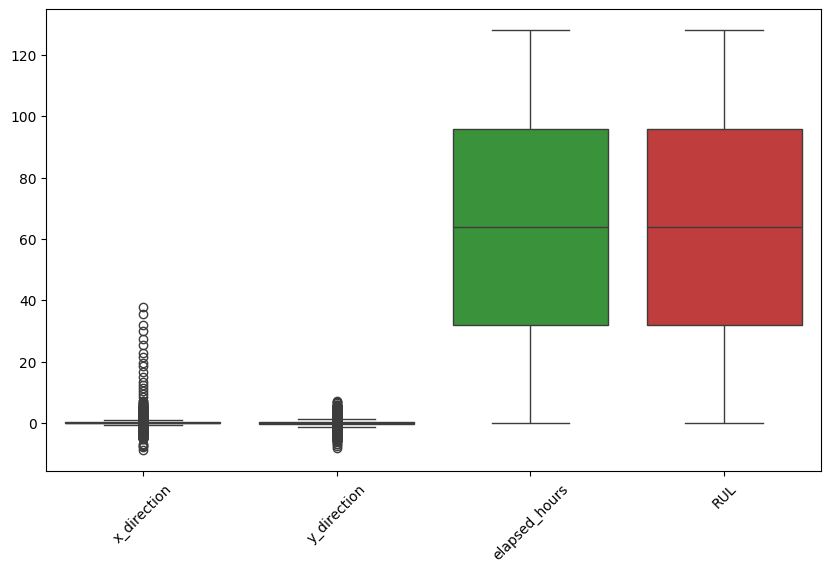

In [24]:

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2[["x_direction", "y_direction", "elapsed_hours", "RUL"]])
plt.xticks(rotation=45)
plt.show()

# This code creates a boxplot to visualize the distribution and detect potential outliers in the 'x_direction', 'y_direction', 'elapsed_hours', and 'RUL' columns of the dataset df2
# The expected output is a boxplot where each variable is represented individually, making it easy to spot the spread of data and identify any outliers across the different features.

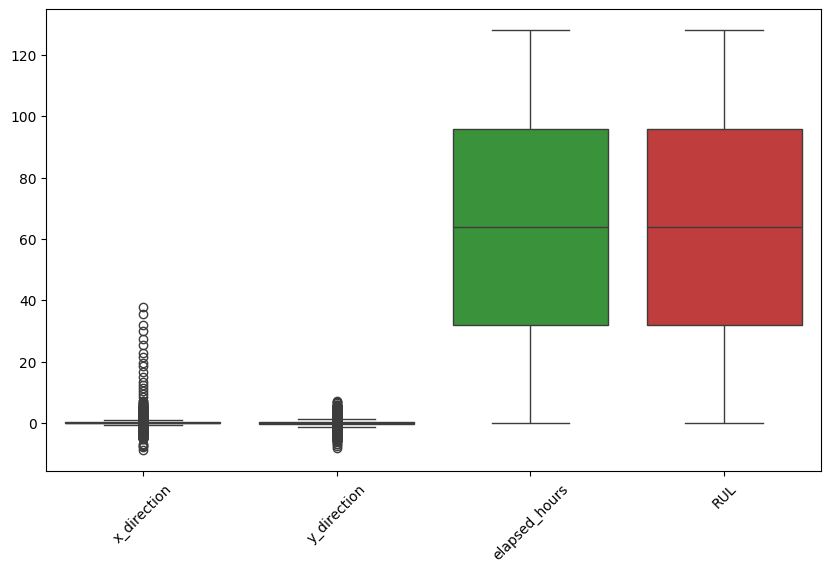

In [25]:

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2[["x_direction", "y_direction", "elapsed_hours", "RUL"]])
plt.xticks(rotation=45)
plt.show()

# This code cleans the dataset by removing outliers to ensure higher-quality data for training the machine learning model. It first calculates the first quartile (Q1) and third quartile (Q3) for each feature in df2, then computes the interquartile range (IQR) as the difference between Q3 and Q1. Using the IQR method, it defines lower and upper bounds to detect outliers. Any data points lying below the lower bound or above the upper bound are considered outliers.

In [43]:

#clean the outlier to get the most useable data for the the traing of the model
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

# Define lower & upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
df3 = df2[~((df2 < lower_bound) | (df2 > upper_bound)).any(axis=1)]

In [44]:
df3.shape

(478412, 4)

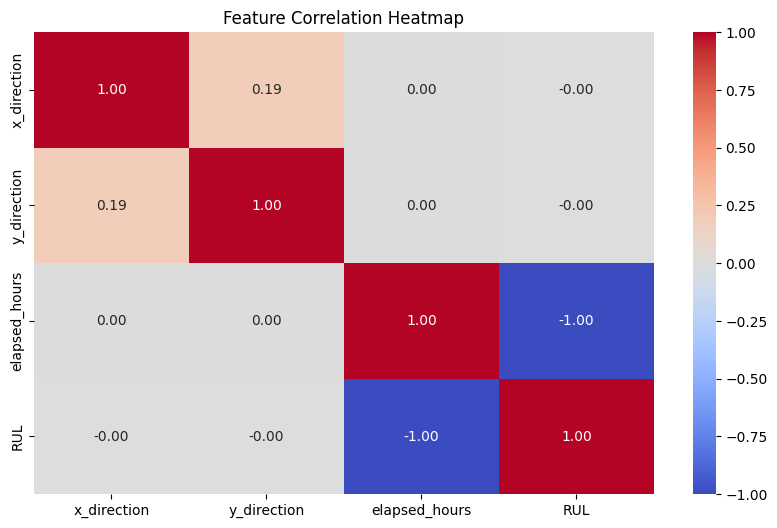

In [45]:
# Heatmap of feature correlations
plt.figure(figsize=(10,6))
sns.heatmap(df3.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

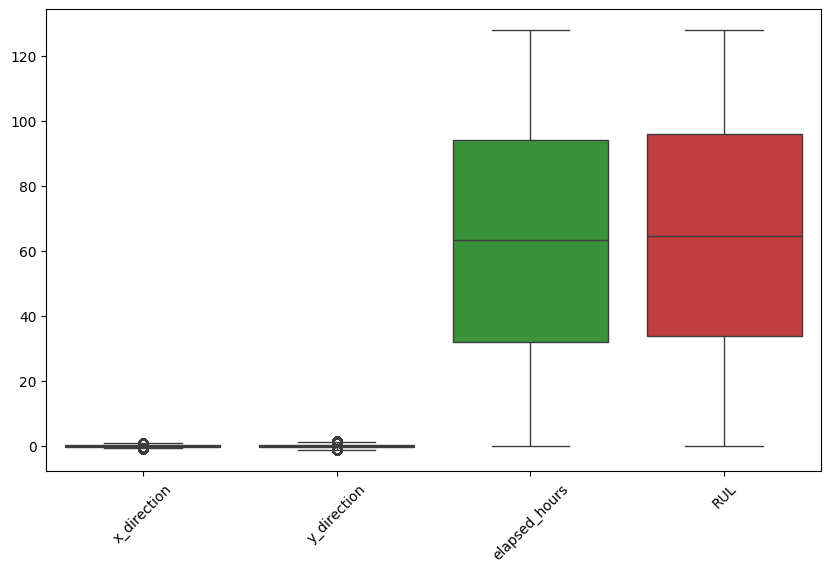

In [46]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3[["x_direction", "y_direction", "elapsed_hours", "RUL"]])
plt.xticks(rotation=45)
plt.show()

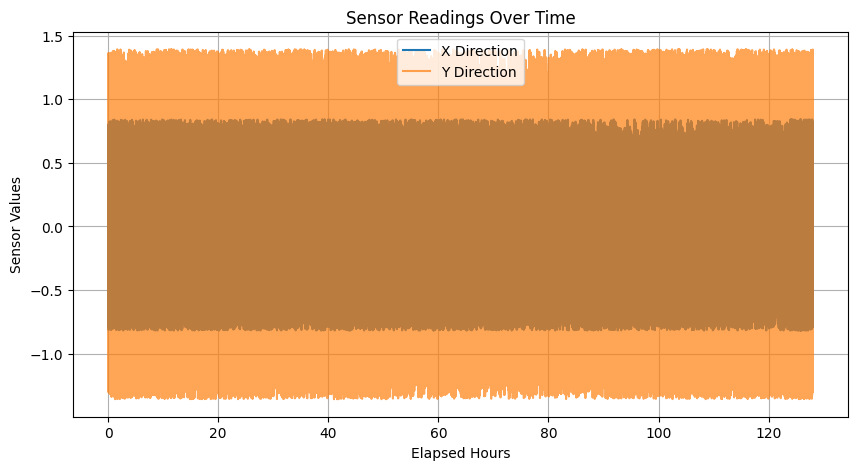

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(df['elapsed_hours'], df3['x_direction'], label='X Direction')
plt.plot(df['elapsed_hours'], df3['y_direction'], label='Y Direction', alpha=0.7)
plt.xlabel('Elapsed Hours')
plt.ylabel('Sensor Values')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Time series feature engineering on vibration data
df3["rolling_mean_x"] = df3["x_direction"].rolling(window=5).mean()
df3["rolling_mean_y"] = df3["y_direction"].rolling(window=5).mean()

df3["ewma_x"] = df3["x_direction"].ewm(span=5).mean()
df3["ewma_y"] = df3["y_direction"].ewm(span=5).mean()

df3["delta_x"] = df3["x_direction"].diff()
df3["delta_y"] = df3["y_direction"].diff()

df3["rolling_std_x"] = df3["x_direction"].rolling(window=5).std()
df3["rolling_std_y"] = df3["y_direction"].rolling(window=5).std()

df3["vib_magnitude"] = (df3["x_direction"]**2 + df3["y_direction"]**2)**0.5

# Drop NaN rows created by rolling, diff, etc.
df3.dropna(inplace=True)


<ipython-input-47-a18c9cc5342e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["rolling_mean_x"] = df3["x_direction"].rolling(window=5).mean()
<ipython-input-47-a18c9cc5342e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["rolling_mean_y"] = df3["y_direction"].rolling(window=5).mean()
<ipython-input-47-a18c9cc5342e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [48]:

df3.head()


,x_direction,y_direction,elapsed_hours,RUL,rolling_mean_x,rolling_mean_y,ewma_x,ewma_y,delta_x,delta_y,rolling_std_x,rolling_std_y,vib_magnitude
5,0.053128,0.367732,0.001240,127.998760,-0.140045,0.031940,-0.064577,0.112520,0.076584,0.397936,0.267112,0.374130,0.371550
7,0.286935,0.410146,0.001736,127.998264,-0.059138,0.189615,0.063870,0.221277,0.233806,0.042414,0.329573,0.320306,0.500551
8,-0.402883,0.534557,0.001984,127.998016,-0.018685,0.203587,-0.101386,0.332195,-0.689818,0.124411,0.248155,0.336423,0.669377
9,0.162021,-0.191624,0.002233,127.997767,0.015149,0.218121,-0.010019,0.150499,0.564904,-0.726181,0.261306,0.311827,0.250939
10,-0.237505,-0.121969,0.002481,127.997519,-0.027661,0.199768,-0.087873,0.057251,-0.399526,0.069655,0.285615,0.332136,0.266992


In [50]:

df3.isnull().sum()


,0
x_direction,0
y_direction,0
elapsed_hours,0
RUL,0
rolling_mean_x,0
rolling_mean_y,0
ewma_x,0
ewma_y,0
delta_x,0
delta_y,0


In [51]:
df3.shape

(478348, 13)

In [52]:

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# # Select only numerical columns
# cols_to_scale = ["x_direction", "y_direction", 'RUL',"elapsed_hours", "rolling_mean_x", "rolling_mean_y", "ewma_x", "ewma_y", "delta_x", "delta_y"]
# df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_scale = [
    "x_direction", "y_direction", "RUL", "elapsed_hours",
    "rolling_mean_x", "rolling_mean_y",
    "ewma_x", "ewma_y",
    "delta_x", "delta_y"
]

df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])


<ipython-input-52-6d55a74857ed>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])


In [55]:
# def create_sequences_fast(data, seq_length):
#     data = data.to_numpy()  # Convert DataFrame to NumPy once!
#     X, y = [], []
#     for i in range(len(data) - seq_length):
#         X.append(data[i:i+seq_length, :-1])  # Features
#         y.append(data[i+seq_length, -1])    # Target (RUL)
#     return np.array(X), np.array(y)

# # Create sequences with a length of 50 (can adjust)
# seq_length = 50
# X, y = create_sequences_fast(df, seq_length)
import numpy as np

def create_sequences_fast(dataframe, seq_length):
    data = dataframe.to_numpy()  # Ensure it's NumPy
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # All except last col
        y.append(data[i+seq_length, -1])     # Last col is RUL
    return np.array(X), np.array(y)

# Make sure RUL is the last column
# Optional: df3 = df3[[...all other columns..., 'RUL']]

# Create sequences
seq_length = 50
X, y = create_sequences_fast(df3, seq_length)

print("X shape:", X.shape)  # Expected: (samples, 50, num_features)
print("y shape:", y.shape)  # Expected: (samples,)


X shape: (478298, 50, 12)
y shape: (478298,)


In [ ]:
X.shape

(508690, 50, 9)

In [56]:
# Chronological train-test split
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [57]:
X_train.shape

(382638, 50, 12)

In [58]:
X_test.shape

(95660, 50, 12)

In [59]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# import tensorflow as tf

# # Define LSTM model
# model = Sequential([
#     LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
#     Dropout(0.2),
#     LSTM(32, return_sequences=False),
#     BatchNormalization(),
#     Dense(1, activation='linear')  # Output layer
# ])

# # Compile model
# optimizer = Adam(learning_rate=0.0001)
# model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=['mae'])

# # Show summary
# model.summary()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),

    LSTM(32, return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),

    LSTM(16, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=['mae'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 64)         │        19,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,729 (139.57 KB)

 Trainable params: 35,505 (138.69 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:

 #Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_test, y_test))
# Train the model
#history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/30
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - loss: 0.0518 - mae: 0.2366 - val_loss: 0.0048 - val_mae: 0.0791
Epoch 2/30
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 76s 11ms/step - loss: 0.0047 - mae: 0.0779 - val_loss: 0.0043 - val_mae: 0.0746
Epoch 3/30
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 0.0045 - mae: 0.0761 - val_loss: 0.0043 - val_mae: 0.0747
Epoch 4/30
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - loss: 0.0044 - mae: 0.0757 - val_loss: 0.0043 - val_mae: 0.0749
Epoch 5/30
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - loss: 0.0044 - mae: 0.0755 - val_loss: 0.0047 - val_mae: 0.0779
Epoch 6/30
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - loss: 0.0044 - mae: 0.0754 - val_loss: 0.0042 - val_mae: 0.0743
Epoch 7/30
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - loss: 0.0044 - mae: 0.0752 - val_loss: 0.0043 - val_mae: 0.0747
Epoch 8/30
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - loss: 0.0044 - mae: 0.0753 - val_loss: 0.0042 - val_mae: 0.0742
Epoch 9/30
3180/3180 ━━━

In [60]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, checkpoint],
    shuffle=False
)


Epoch 1/50


KeyboardInterrupt: 

3180/3180 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


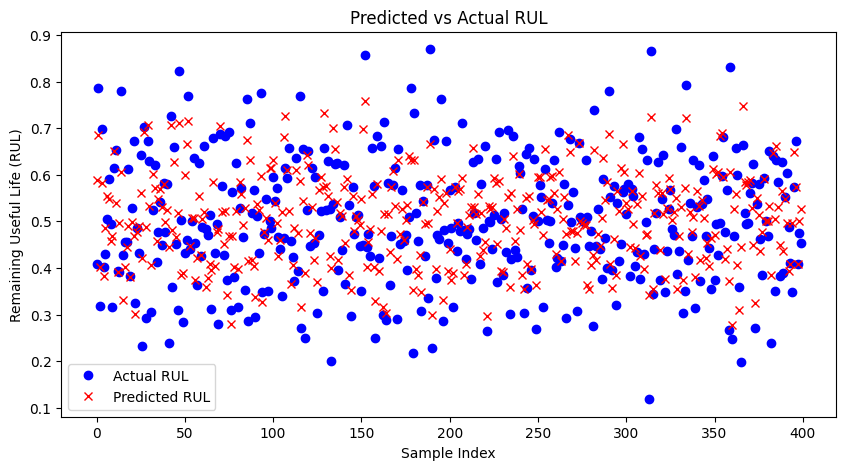

In [ ]:
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test[:400], "bo", label="Actual RUL")  # Blue dots
plt.plot(y_pred[:400], "rx", label="Predicted RUL")  # Red crosses
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.title("Predicted vs Actual RUL")
plt.show()

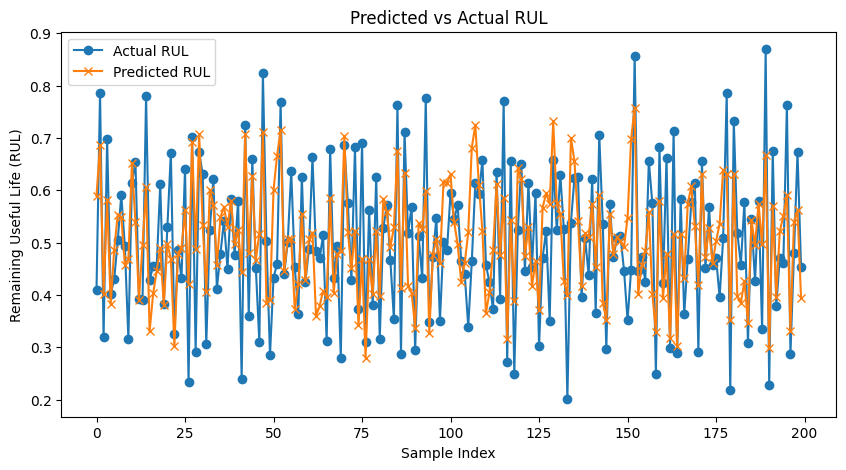

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test[:200], label="Actual RUL", marker='o')  # First 100 points
plt.plot(y_pred[:200], label="Predicted RUL", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (RUL)")
plt.title("Predicted vs Actual RUL")
plt.legend()
plt.show()

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"📊 Model Evaluation Results:")
print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")

📊 Model Evaluation Results:
✅ Mean Absolute Error (MAE): 0.0743
✅ Root Mean Squared Error (RMSE): 0.0921
✅ R² Score: 0.5003


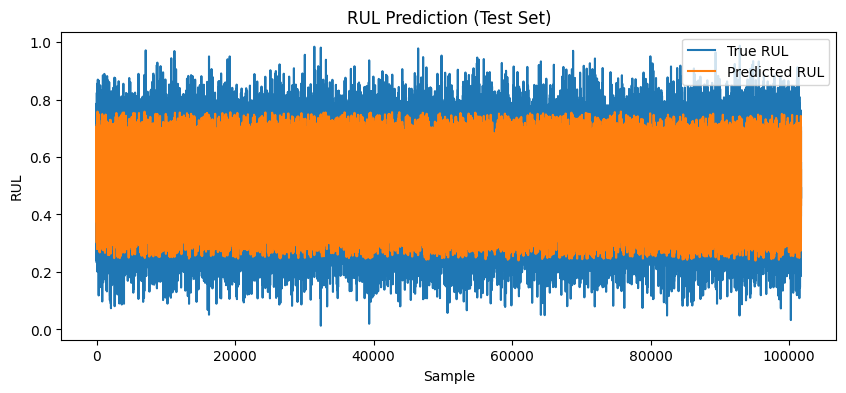

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_test, label='True RUL')
plt.plot(y_pred, label='Predicted RUL')
plt.legend()
plt.title("RUL Prediction (Test Set)")
plt.xlabel("Sample")
plt.ylabel("RUL")
plt.show()

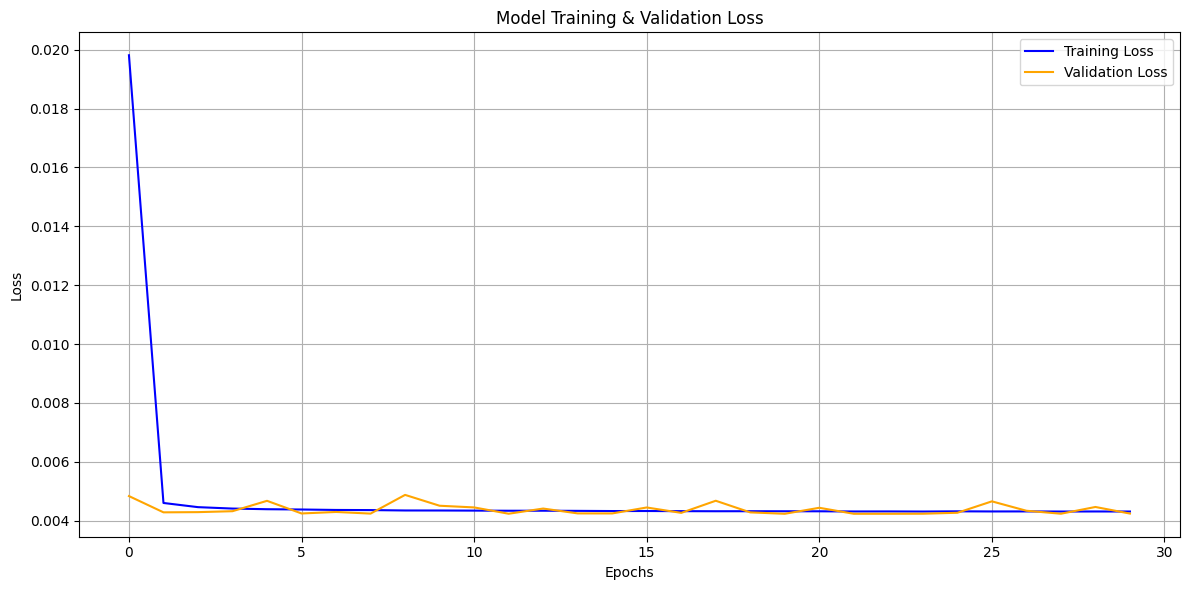

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history (loss and validation loss)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


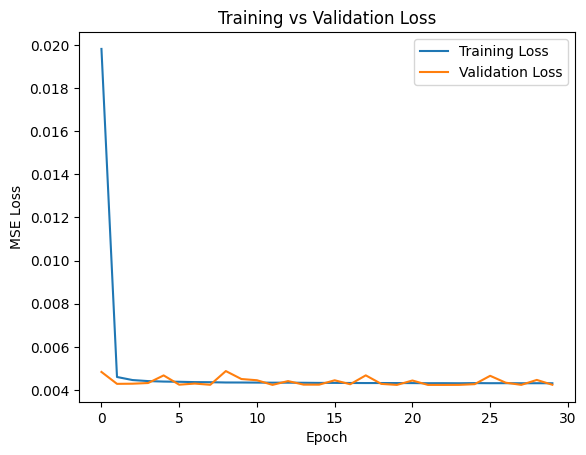

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


3180/3180 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step
Test MAE: 0.0743
Test RMSE: 0.0921
Test R²: 0.5003


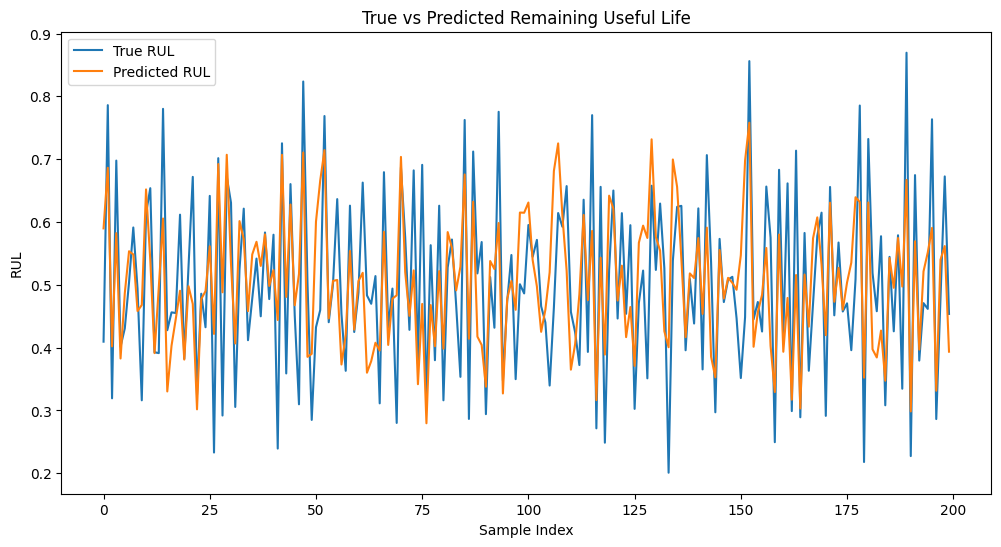

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test[:200], label='True RUL')
plt.plot(y_pred[:200], label='Predicted RUL')
plt.legend()
plt.title("True vs Predicted Remaining Useful Life")
plt.xlabel("Sample Index")
plt.ylabel("RUL")
plt.show()


In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/sample_vibration.csv')

In [ ]:
dff.shape

(101201, 10)

In [ ]:
dff.head()

,x_direction,y_direction,x_direction_mean,x_direction_std,x_direction_kurt,x_direction_skew,y_direction_mean,y_direction_std,y_direction_kurt,y_direction_skew
0,-0.035818,0.534290,0.018504,0.390949,1.324956,-0.115482,0.014775,0.593012,0.681066,0.041985
1,-0.161955,-0.509890,0.018459,0.390967,1.324139,-0.115181,0.014643,0.593114,0.678994,0.042227
2,-0.341893,0.044887,0.018064,0.391132,1.317131,-0.112789,0.014320,0.593009,0.681556,0.043672
3,0.314776,-0.293571,0.018617,0.391160,1.316659,-0.116285,0.014149,0.593074,0.680080,0.044399
4,-0.036311,0.112717,0.018248,0.391038,1.321215,-0.114084,0.014504,0.593026,0.681116,0.042699


In [ ]:
model.save('/content/drive/MyDrive/rul_model.keras')  # Save as HDF5 file
# you should also save the normalaization methodimport joblib

joblib.dump(scaler, 'scaler.pkl')  # Save your scaler (used for features)
joblib.dump(rul_scaler, 'rul_scaler.pkl')  # If you used one for the target
